In [1]:
import pandas as pd
import numpy as np

import sidetable as stb

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats

plt.rcParams['figure.figsize'] = (10, 10)
pd.options.display.max_columns = None

from datetime import datetime

In [2]:
df = pd.read_csv("data/bikes.csv", index_col= 0)
df.drop(["instant"], axis= 1, inplace= True)

In [3]:
#Hacemos dos listas con variables numéricas y variables categóricas

lista_num = ['temperatura', 'sensacion_termica', 'humedad', 'velocidad_viento', 'alquiler_casual', 'alquiler_registrado', 'total_alquileres']
lista_cat = ['estacion', 'año', 'mes', 'festivo', 'dia_sem', 'laborable', 'prevision_tiempo']
lista_cat2 = ['año', 'mes', 'festivo', 'dia_sem', 'laborable', 'prevision_tiempo']

In [4]:
dict(enumerate(lista_num))

{0: 'temperatura',
 1: 'sensacion_termica',
 2: 'humedad',
 3: 'velocidad_viento',
 4: 'alquiler_casual',
 5: 'alquiler_registrado',
 6: 'total_alquileres'}

ValueError: Could not interpret input 'temperatura'

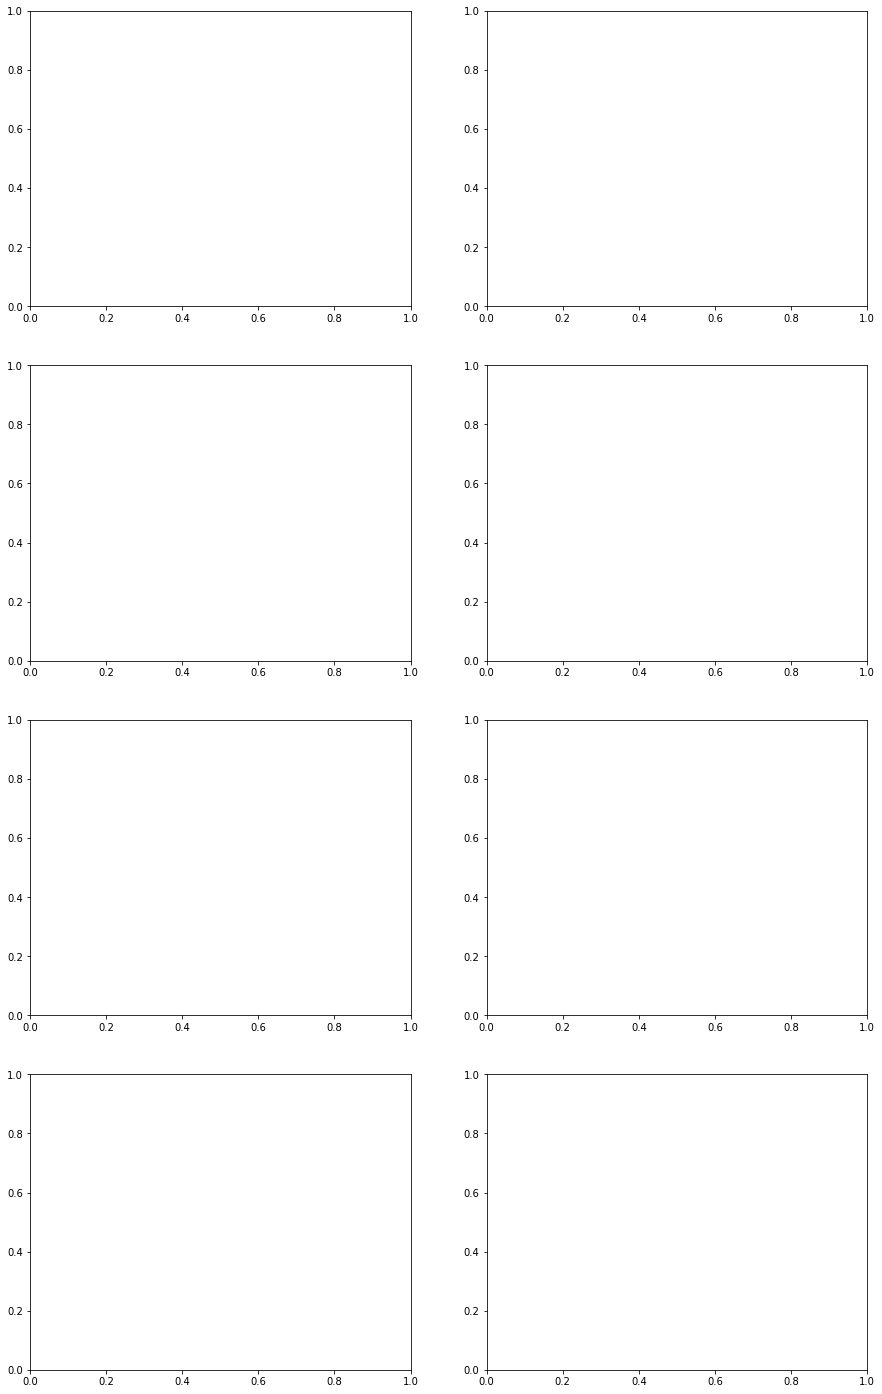

In [5]:
#Realizamos los boxplot de las variables numéricas

fig, axes = plt.subplots(4, 2, figsize=(15, 25))
axes = axes.flat

for indice, elemento in enumerate(lista_num):
    sns.boxplot(x = elemento, data = df, ax=axes[indice], color = "aquamarine")
    
    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show();

CONCLUSIONES

Estas son las columnas que presentan outliers:

    -humedad
    -velocidad_viento
    -alquiler_casual

In [ ]:
#Realizamos los boxplot de las variables categoricas

fig, axes = plt.subplots(3, 2, figsize=(15, 25))
axes = axes.flat

for indice, elemento in enumerate(lista_cat2):
    sns.boxplot(y = elemento, data = df, ax=axes[indice], color = "salmon")
    
    
plt.tight_layout()
plt.show()

In [ ]:
df['festivo'].value_counts()

CONCLUSION

Hay outliers en la columna de festivos, ya que hay bastante más días que no son festivos (0) que días que son festivos (1)